##### Copyright 2022 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Load LM Checkpoints using Model Garden

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tfmodels/nlp/load_lm_ckpts"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/models/blob/master/docs/nlp/load_lm_ckpts.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/models/blob/master/docs/nlp/load_lm_ckpts.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/models/docs/nlp/load_lm_ckpts.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates how to load BERT, ALBERT and ELECTRA pretrained checkpoints and use them for downstream tasks.

[Model Garden](https://www.tensorflow.org/tfmodels) contains a collection of state-of-the-art models, implemented with TensorFlow's high-level APIs. The implementations demonstrate the best practices for modeling, letting users to take full advantage of TensorFlow for their research and product development.

## Install TF Model Garden package

In [2]:
!pip install -U -q "tf-models-official"

## Import necessary libraries

In [3]:
import os
import yaml
import json

import tensorflow as tf

2023-10-17 12:27:09.738068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 12:27:09.738115: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 12:27:09.738155: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import tensorflow_models as tfm

from official.core import exp_factory

## Load BERT model pretrained checkpoints

### Select required BERT model

In [5]:
# @title Download Checkpoint of the Selected Model { display-mode: "form", run: "auto" }
model_display_name = 'BERT-base cased English'  # @param ['BERT-base uncased English','BERT-base cased English','BERT-large uncased English', 'BERT-large cased English', 'BERT-large, Uncased (Whole Word Masking)', 'BERT-large, Cased (Whole Word Masking)', 'BERT-base MultiLingual','BERT-base Chinese']

if model_display_name == 'BERT-base uncased English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/uncased_L-12_H-768_A-12.tar.gz"
  !tar -xvf "uncased_L-12_H-768_A-12.tar.gz"
elif model_display_name == 'BERT-base cased English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/cased_L-12_H-768_A-12.tar.gz"
  !tar -xvf "cased_L-12_H-768_A-12.tar.gz"
elif model_display_name == "BERT-large uncased English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/uncased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "uncased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-large cased English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/cased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "cased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-large, Uncased (Whole Word Masking)":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/wwm_uncased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "wwm_uncased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-large, Cased (Whole Word Masking)":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/wwm_cased_L-24_H-1024_A-16.tar.gz"
  !tar -xvf "wwm_cased_L-24_H-1024_A-16.tar.gz"
elif model_display_name == "BERT-base MultiLingual":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/multi_cased_L-12_H-768_A-12.tar.gz"
  !tar -xvf "multi_cased_L-12_H-768_A-12.tar.gz"
elif model_display_name == "BERT-base Chinese":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/chinese_L-12_H-768_A-12.tar.gz"
  !tar -xvf "chinese_L-12_H-768_A-12.tar.gz"

--2023-10-17 12:27:14--  https://storage.googleapis.com/tf_model_garden/nlp/bert/v3/cased_L-12_H-768_A-12.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.207, 209.85.146.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.207|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 401886728 (383M) [application/octet-stream]
Saving to: ‘cased_L-12_H-768_A-12.tar.gz’

          cased_L-1   0%[                    ]       0  --.-KB/s               

         cased_L-12   2%[                    ]   8.01M  39.0MB/s               

        cased_L-12_   6%[>                   ]  24.01M  44.1MB/s               

       cased_L-12_H  11%[=>                  ]  43.82M  58.9MB/s               

      cased_L-12_H-  15%[==>                 ]  59.02M  62.5MB/s               

     cased_L-12_H-7  19%[==>                 ]  73.48M  64.2MB/s               

    cased_L-12_H-76  25%[====>               ]  96.01M  69.1MB/s               

   cased_L-12_H-768  28%[====>               ] 108.73M  68.4MB/s               

  cased_L-12_H-768_  31%[=====>              ] 120.01M  61.9MB/s               

 cased_L-12_H-768_A  35%[======>             ] 136.01M  61.9MB/s               

cased_L-12_H-768_A-  39%[======>             ] 152.01M  63.2MB/s               

ased_L-12_H-768_A-1  45%[========>           ] 176.01M  64.9MB/s               

sed_L-12_H-768_A-12  52%[=========>          ] 200.01M  68.6MB/s               

ed_L-12_H-768_A-12.  55%[==========>         ] 214.15M  68.7MB/s    eta 2s     

d_L-12_H-768_A-12.t  61%[===========>        ] 235.60M  71.0MB/s    eta 2s     

_L-12_H-768_A-12.ta  65%[============>       ] 251.98M  71.6MB/s    eta 2s     

L-12_H-768_A-12.tar  66%[============>       ] 256.01M  70.4MB/s    eta 2s     

-12_H-768_A-12.tar.  73%[=============>      ] 280.01M  73.8MB/s    eta 2s     

12_H-768_A-12.tar.g  75%[==============>     ] 288.01M  69.8MB/s    eta 1s     

2_H-768_A-12.tar.gz  78%[==============>     ] 301.40M  69.0MB/s    eta 1s     

_H-768_A-12.tar.gz   83%[===============>    ] 321.52M  70.8MB/s    eta 1s     

H-768_A-12.tar.gz    89%[================>   ] 344.01M  70.1MB/s    eta 1s     

-768_A-12.tar.gz     95%[==================> ] 367.90M  73.5MB/s    eta 1s     

cased_L-12_H-768_A- 100%[===================>] 383.27M  79.4MB/s    in 5.3s    

2023-10-17 12:27:19 (72.9 MB/s) - ‘cased_L-12_H-768_A-12.tar.gz’ saved [401886728/401886728]



cased_L-12_H-768_A-12/
cased_L-12_H-768_A-12/vocab.txt
cased_L-12_H-768_A-12/bert_model.ckpt.index
cased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001


cased_L-12_H-768_A-12/params.yaml
cased_L-12_H-768_A-12/bert_config.json


In [6]:
# Lookup table of the directory name corresponding to each model checkpoint
folder_bert_dict = {
    'BERT-base uncased English': 'uncased_L-12_H-768_A-12',
    'BERT-base cased English': 'cased_L-12_H-768_A-12',
    'BERT-large uncased English': 'uncased_L-24_H-1024_A-16',
    'BERT-large cased English': 'cased_L-24_H-1024_A-16',
    'BERT-large, Uncased (Whole Word Masking)': 'wwm_uncased_L-24_H-1024_A-16',
    'BERT-large, Cased (Whole Word Masking)': 'wwm_cased_L-24_H-1024_A-16',
    'BERT-base MultiLingual': 'multi_cased_L-12_H-768_A-1',
    'BERT-base Chinese': 'chinese_L-12_H-768_A-12'
}

folder_bert = folder_bert_dict.get(model_display_name)
folder_bert

'cased_L-12_H-768_A-12'

### Construct BERT Model Using the New `params.yaml`

params.yaml can be used for training with the bundled trainer in addition to constructing the BERT encoder here.

In [7]:
config_file = os.path.join(folder_bert, "params.yaml")
config_dict = yaml.safe_load(tf.io.gfile.GFile(config_file).read())
config_dict

{'task': {'model': {'encoder': {'bert': {'attention_dropout_rate': 0.1,
     'dropout_rate': 0.1,
     'hidden_activation': 'gelu',
     'hidden_size': 768,
     'initializer_range': 0.02,
     'intermediate_size': 3072,
     'max_position_embeddings': 512,
     'num_attention_heads': 12,
     'num_layers': 12,
     'type_vocab_size': 2,
     'vocab_size': 28996},
    'type': 'bert'}}}}

In [8]:
# Method 1: pass encoder config dict into EncoderConfig
encoder_config = tfm.nlp.encoders.EncoderConfig(config_dict["task"]["model"]["encoder"])
encoder_config.get().as_dict()

{'vocab_size': 28996,
 'hidden_size': 768,
 'num_layers': 12,
 'num_attention_heads': 12,
 'hidden_activation': 'gelu',
 'intermediate_size': 3072,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': None,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'norm_first': False}

In [9]:
# Method 2: use override_params_dict function to override default Encoder params
encoder_config = tfm.nlp.encoders.EncoderConfig()
tfm.hyperparams.override_params_dict(encoder_config, config_dict["task"]["model"]["encoder"], is_strict=True)
encoder_config.get().as_dict()

{'vocab_size': 28996,
 'hidden_size': 768,
 'num_layers': 12,
 'num_attention_heads': 12,
 'hidden_activation': 'gelu',
 'intermediate_size': 3072,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': None,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'norm_first': False}

### Construct BERT Model Using the Old `bert_config.json`

In [10]:
bert_config_file = os.path.join(folder_bert, "bert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())
config_dict

{'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 28996,
 'hidden_activation': 'gelu',
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1}

In [11]:
encoder_config = tfm.nlp.encoders.EncoderConfig({
    'type':'bert',
    'bert': config_dict
})

encoder_config.get().as_dict()

{'vocab_size': 28996,
 'hidden_size': 768,
 'num_layers': 12,
 'num_attention_heads': 12,
 'hidden_activation': 'gelu',
 'intermediate_size': 3072,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': None,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'norm_first': False}

### Construct a classifier with `encoder_config`

Here, we construct a new BERT Classifier with 2 classes and plot its model architecture. A BERT Classifier consists of a BERT encoder using the selected encoder config, a Dropout layer and a MLP classification head.

2023-10-17 12:27:24.243086: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


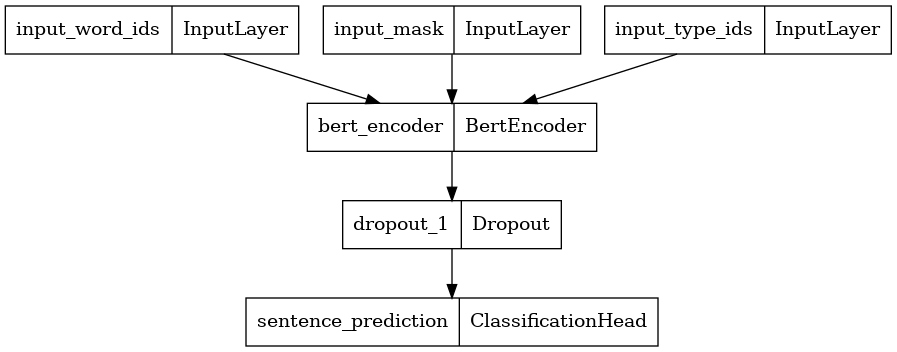

In [12]:
bert_encoder = tfm.nlp.encoders.build_encoder(encoder_config)
bert_classifier = tfm.nlp.models.BertClassifier(network=bert_encoder, num_classes=2)

tf.keras.utils.plot_model(bert_classifier)

### Load Pretrained Weights into the BERT Classifier

The provided pretrained checkpoint only contains weights for the BERT Encoder within the BERT Classifier. Weights for the Classification Head is still randomly initialized.

In [13]:
checkpoint = tf.train.Checkpoint(encoder=bert_encoder)
checkpoint.read(
    os.path.join(folder_bert, 'bert_model.ckpt')).expect_partial().assert_existing_objects_matched()

## Load ALBERT model pretrained checkpoints

In [14]:
# @title Download Checkpoint of the Selected Model { display-mode: "form", run: "auto" }
albert_model_display_name = 'ALBERT-xxlarge English'  # @param ['ALBERT-base English', 'ALBERT-large English', 'ALBERT-xlarge English', 'ALBERT-xxlarge English']

if albert_model_display_name == 'ALBERT-base English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_base.tar.gz"
  !tar -xvf "albert_base.tar.gz"
elif albert_model_display_name == 'ALBERT-large English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_large.tar.gz"
  !tar -xvf "albert_large.tar.gz"
elif albert_model_display_name == "ALBERT-xlarge English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_xlarge.tar.gz"
  !tar -xvf "albert_xlarge.tar.gz"
elif albert_model_display_name == "ALBERT-xxlarge English":
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_xxlarge.tar.gz"
  !tar -xvf "albert_xxlarge.tar.gz"

--2023-10-17 12:27:27--  https://storage.googleapis.com/tf_model_garden/nlp/albert/albert_xxlarge.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.207, 172.217.214.207, 142.251.6.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.207|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 826059238 (788M) [application/octet-stream]
Saving to: ‘albert_xxlarge.tar.gz’

albert_xxlarge.tar.   0%[                    ]       0  --.-KB/s               

albert_xxlarge.tar.   1%[                    ]   8.01M  36.0MB/s               

albert_xxlarge.tar.   5%[>                   ]  40.01M  87.1MB/s               

albert_xxlarge.tar.   9%[>                   ]  72.01M   102MB/s               

albert_xxlarge.tar.  13%[=>                  ] 104.01M   113MB/s               

albert_xxlarge.tar.  17%[==>                 ] 136.01M   122MB/s               

albert_xxlarge.tar.  20%[===>                ] 160.01M   120MB/s               

albert_xxlarge.tar.  23%[===>                ] 189.05M   123MB/s               

albert_xxlarge.tar.  26%[====>               ] 208.35M   120MB/s               

albert_xxlarge.tar.  29%[====>               ] 235.73M   122MB/s               

albert_xxlarge.tar.  33%[=====>              ] 267.62M   125MB/s               

albert_xxlarge.tar.  36%[======>             ] 291.15M   125MB/s               

albert_xxlarge.tar.  40%[=======>            ] 315.29M   124MB/s               

albert_xxlarge.tar.  41%[=======>            ] 329.50M   121MB/s               

albert_xxlarge.tar.  46%[========>           ] 363.59M   124MB/s               

albert_xxlarge.tar.  49%[========>           ] 392.01M   123MB/s    eta 3s     

albert_xxlarge.tar.  53%[=========>          ] 424.01M   124MB/s    eta 3s     

albert_xxlarge.tar.  57%[==========>         ] 456.01M   123MB/s    eta 3s     

albert_xxlarge.tar.  61%[===========>        ] 486.80M   130MB/s    eta 3s     

albert_xxlarge.tar.  64%[===========>        ] 509.65M   129MB/s    eta 3s     

albert_xxlarge.tar.  65%[============>       ] 517.79M   124MB/s    eta 2s     

albert_xxlarge.tar.  70%[=============>      ] 552.01M   121MB/s    eta 2s     

albert_xxlarge.tar.  74%[=============>      ] 584.01M   119MB/s    eta 2s     

albert_xxlarge.tar.  77%[==============>     ] 610.95M   121MB/s    eta 2s     

albert_xxlarge.tar.  80%[===============>    ] 632.01M   119MB/s    eta 2s     

albert_xxlarge.tar.  84%[===============>    ] 664.01M   121MB/s    eta 1s     

albert_xxlarge.tar.  88%[================>   ] 696.01M   118MB/s    eta 1s     

albert_xxlarge.tar.  93%[=================>  ] 736.01M   122MB/s    eta 1s     

albert_xxlarge.tar.  97%[==================> ] 768.01M   118MB/s    eta 1s     

albert_xxlarge.tar. 100%[===================>] 787.79M   117MB/s    in 6.5s    

2023-10-17 12:27:34 (122 MB/s) - ‘albert_xxlarge.tar.gz’ saved [826059238/826059238]



albert_xxlarge/
albert_xxlarge/bert_model.ckpt.index
albert_xxlarge/30k-clean.model
albert_xxlarge/30k-clean.vocab
albert_xxlarge/bert_model.ckpt.data-00000-of-00001


albert_xxlarge/params.yaml
albert_xxlarge/albert_config.json


In [15]:
# Lookup table of the directory name corresponding to each model checkpoint
folder_albert_dict = {
    'ALBERT-base English': 'albert_base',
    'ALBERT-large English': 'albert_large',
    'ALBERT-xlarge English': 'albert_xlarge',
    'ALBERT-xxlarge English': 'albert_xxlarge'
}

folder_albert = folder_albert_dict.get(albert_model_display_name)
folder_albert

'albert_xxlarge'

### Construct ALBERT Model Using the New `params.yaml`

params.yaml can be used for training with the bundled trainer in addition to constructing the BERT encoder here.

In [16]:
config_file = os.path.join(folder_albert, "params.yaml")
config_dict = yaml.safe_load(tf.io.gfile.GFile(config_file).read())
config_dict

{'task': {'model': {'encoder': {'albert': {'attention_dropout_rate': 0.0,
     'dropout_rate': 0.0,
     'embedding_width': 128,
     'hidden_activation': 'gelu',
     'hidden_size': 4096,
     'initializer_range': 0.02,
     'intermediate_size': 16384,
     'max_position_embeddings': 512,
     'num_attention_heads': 64,
     'num_layers': 12,
     'type_vocab_size': 2,
     'vocab_size': 30000},
    'type': 'albert'}}}}

In [17]:
# Method 1: pass encoder config dict into EncoderConfig
encoder_config = tfm.nlp.encoders.EncoderConfig(config_dict["task"]["model"]["encoder"])
encoder_config.get().as_dict()

{'vocab_size': 30000,
 'embedding_width': 128,
 'hidden_size': 4096,
 'num_layers': 12,
 'num_attention_heads': 64,
 'hidden_activation': 'gelu',
 'intermediate_size': 16384,
 'dropout_rate': 0.0,
 'attention_dropout_rate': 0.0,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02}

In [18]:
# Method 2: use override_params_dict function to override default Encoder params
encoder_config = tfm.nlp.encoders.EncoderConfig()
tfm.hyperparams.override_params_dict(encoder_config, config_dict["task"]["model"]["encoder"], is_strict=True)
encoder_config.get().as_dict()

{'vocab_size': 30000,
 'embedding_width': 128,
 'hidden_size': 4096,
 'num_layers': 12,
 'num_attention_heads': 64,
 'hidden_activation': 'gelu',
 'intermediate_size': 16384,
 'dropout_rate': 0.0,
 'attention_dropout_rate': 0.0,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02}

### Construct ALBERT Model Using the Old `albert_config.json`

In [19]:
albert_config_file = os.path.join(folder_albert, "albert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(albert_config_file).read())
config_dict

{'hidden_size': 4096,
 'initializer_range': 0.02,
 'intermediate_size': 16384,
 'max_position_embeddings': 512,
 'num_attention_heads': 64,
 'type_vocab_size': 2,
 'vocab_size': 30000,
 'embedding_width': 128,
 'attention_dropout_rate': 0.0,
 'dropout_rate': 0.0,
 'num_layers': 12,
 'hidden_activation': 'gelu'}

In [20]:
encoder_config = tfm.nlp.encoders.EncoderConfig({
    'type':'albert',
    'albert': config_dict
})

encoder_config.get().as_dict()

{'vocab_size': 30000,
 'embedding_width': 128,
 'hidden_size': 4096,
 'num_layers': 12,
 'num_attention_heads': 64,
 'hidden_activation': 'gelu',
 'intermediate_size': 16384,
 'dropout_rate': 0.0,
 'attention_dropout_rate': 0.0,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02}

### Construct a Classifier with `encoder_config`

Here, we construct a new BERT Classifier with 2 classes and plot its model architecture. A BERT Classifier consists of a BERT encoder using the selected encoder config, a Dropout layer and a MLP classification head.

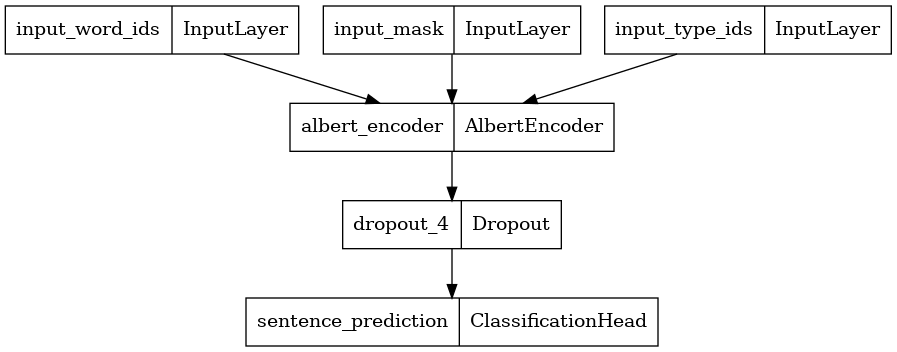

In [21]:
albert_encoder = tfm.nlp.encoders.build_encoder(encoder_config)
albert_classifier = tfm.nlp.models.BertClassifier(network=albert_encoder, num_classes=2)

tf.keras.utils.plot_model(albert_classifier)

### Load Pretrained Weights into the Classifier

The provided pretrained checkpoint only contains weights for the ALBERT Encoder within the ALBERT Classifier. Weights for the Classification Head is still randomly initialized.

In [22]:
checkpoint = tf.train.Checkpoint(encoder=albert_encoder)
checkpoint.read(
    os.path.join(folder_albert, 'bert_model.ckpt')).expect_partial().assert_existing_objects_matched()

## Load ELECTRA model pretrained checkpoints

In [23]:
# @title Download Checkpoint of the Selected Model { display-mode: "form", run: "auto" }
electra_model_display_name = 'ELECTRA-small English'  # @param ['ELECTRA-small English', 'ELECTRA-base English']

if electra_model_display_name == 'ELECTRA-small English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/electra/small.tar.gz"
  !tar -xvf "small.tar.gz"
elif electra_model_display_name == 'ELECTRA-base English':
  !wget "https://storage.googleapis.com/tf_model_garden/nlp/electra/base.tar.gz"
  !tar -xvf "base.tar.gz"

--2023-10-17 12:27:45--  https://storage.googleapis.com/tf_model_garden/nlp/electra/small.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.207, 172.217.214.207, 142.251.6.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.207|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 157951922 (151M) [application/octet-stream]
Saving to: ‘small.tar.gz’

small.tar.gz          0%[                    ]       0  --.-KB/s               

small.tar.gz         10%[=>                  ]  16.01M  79.9MB/s               

small.tar.gz         39%[======>             ]  59.93M   150MB/s               

small.tar.gz         63%[===========>        ]  96.01M   153MB/s               

small.tar.gz         92%[=================>  ] 138.75M   167MB/s               

small.tar.gz        100%[===================>] 150.63M   173MB/s    in 0.9s    

2023-10-17 12:27:46 (173 MB/s) - ‘small.tar.gz’ saved [157951922/157951922]



small/
small/ckpt-1000000.data-00000-of-00001


small/params.yaml
small/checkpoint
small/ckpt-1000000.index


In [24]:
# Lookup table of the directory name corresponding to each model checkpoint
folder_electra_dict = {
    'ELECTRA-small English': 'small',
    'ELECTRA-base English': 'base'
}

folder_electra = folder_electra_dict.get(electra_model_display_name)
folder_electra

'small'

### Construct BERT Model Using the `params.yaml`

params.yaml can be used for training with the bundled trainer in addition to constructing the BERT encoder here.

In [25]:
config_file = os.path.join(folder_electra, "params.yaml")
config_dict = yaml.safe_load(tf.io.gfile.GFile(config_file).read())
config_dict

{'model': {'cls_heads': [{'activation': 'tanh',
    'cls_token_idx': 0,
    'dropout_rate': 0.1,
    'inner_dim': 64,
    'name': 'next_sentence',
    'num_classes': 2}],
  'disallow_correct': False,
  'discriminator_encoder': {'type': 'bert',
   'bert': {'attention_dropout_rate': 0.1,
    'dropout_rate': 0.1,
    'embedding_size': 128,
    'hidden_activation': 'gelu',
    'hidden_size': 256,
    'initializer_range': 0.02,
    'intermediate_size': 1024,
    'max_position_embeddings': 512,
    'num_attention_heads': 4,
    'num_layers': 12,
    'type_vocab_size': 2,
    'vocab_size': 30522}},
  'discriminator_loss_weight': 50.0,
  'generator_encoder': {'type': 'bert',
   'bert': {'attention_dropout_rate': 0.1,
    'dropout_rate': 0.1,
    'embedding_size': 128,
    'hidden_activation': 'gelu',
    'hidden_size': 64,
    'initializer_range': 0.02,
    'intermediate_size': 256,
    'max_position_embeddings': 512,
    'num_attention_heads': 1,
    'num_layers': 12,
    'type_vocab_size': 2

In [26]:
disc_encoder_config = tfm.nlp.encoders.EncoderConfig(
    config_dict['model']['discriminator_encoder']
)

disc_encoder_config.get().as_dict()

{'vocab_size': 30522,
 'hidden_size': 256,
 'num_layers': 12,
 'num_attention_heads': 4,
 'hidden_activation': 'gelu',
 'intermediate_size': 1024,
 'dropout_rate': 0.1,
 'attention_dropout_rate': 0.1,
 'max_position_embeddings': 512,
 'type_vocab_size': 2,
 'initializer_range': 0.02,
 'embedding_size': 128,
 'output_range': None,
 'return_all_encoder_outputs': False,
 'return_attention_scores': False,
 'norm_first': False}

### Construct a Classifier with `encoder_config`

Here, we construct a Classifier with 2 classes and plot its model architecture. A Classifier consists of a ELECTRA discriminator encoder using the selected encoder config, a Dropout layer and a MLP classification head.

**Note**: The generator is discarded and the discriminator is used for downstream tasks

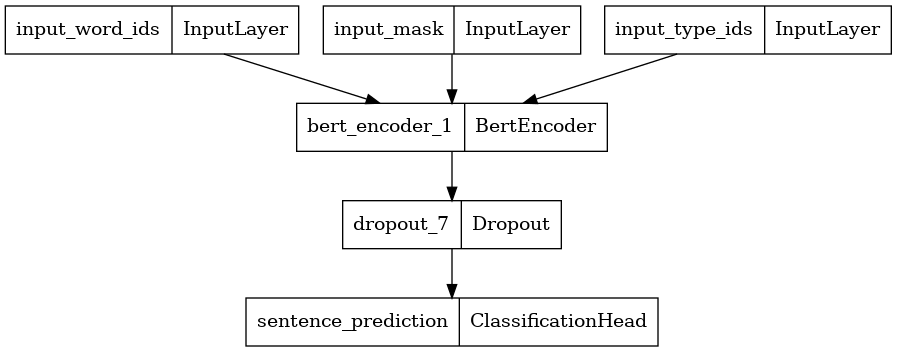

In [27]:
disc_encoder = tfm.nlp.encoders.build_encoder(disc_encoder_config)
elctra_dic_classifier = tfm.nlp.models.BertClassifier(network=disc_encoder, num_classes=2)
tf.keras.utils.plot_model(elctra_dic_classifier)

### Load Pretrained Weights into the Classifier

The provided pretrained checkpoint contains weights for the entire ELECTRA model. We are only loading its discriminator (conveninently named as `encoder`) wights within the Classifier. Weights for the Classification Head is still randomly initialized.

In [28]:
checkpoint = tf.train.Checkpoint(encoder=disc_encoder)
checkpoint.read(
    tf.train.latest_checkpoint(os.path.join(folder_electra))
    ).expect_partial().assert_existing_objects_matched()